<a href="https://colab.research.google.com/github/Chris-Joy26/Chris-Infosys-Nov24/blob/main/WEEK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WEEK 1
******
DATA COLLECTION

MOUNTING THE DRIVE TO ACCESS FILES FROM DRIVE TO GOOGLE COLLAB.

In [96]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IMPORTING NECESSARY LIBRARIES

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

READING THE PRODUCTA EXCEL FILE.

In [98]:
producta=pd.read_excel(r'/content/drive/My Drive/infosys internship/Datasets/ProductA.xlsx')
print("THE FIRST FIVE ROWS OF THE PRODUCTA DATASET ARE:")
producta.head()

THE FIRST FIVE ROWS OF THE PRODUCTA DATASET ARE:


,Day Index,Quantity
0,2021-12-01,14
1,2021-12-02,10
2,2021-12-03,13
3,2021-12-04,22
4,2021-12-05,33


READING THE PRODUCTA_FB_IMPRESSIONS EXCEL FILE.

In [100]:
facebook_impressions=pd.read_excel(r'/content/drive/My Drive/infosys internship/Datasets/ProductA_fb_impressions.xlsx')
print("THE FIRST FIVE ROWS OF THE FACEBOOK_IMPRESSION DATASET ARE:")
facebook_impressions.head()

THE FIRST FIVE ROWS OF THE FACEBOOK_IMPRESSION DATASET ARE:


,Day Index,Impressions
0,2021-12-01,620
1,2021-12-02,890
2,2021-12-03,851
3,2021-12-04,881
4,2021-12-05,678


READING THE PRODUCTA_GOOGLE_CLICKS EXCEL FILE.

In [101]:
google_clicks=pd.read_excel(r'/content/drive/My Drive/infosys internship/Datasets/ProductA_google_clicks.xlsx')
print("THE FIRST FIVE ROWS OF THE GOOGLE_CLICKS DATASET ARE;")
google_clicks.head()

THE FIRST FIVE ROWS OF THE GOOGLE_CLICKS DATASET ARE;


,Day Index,Clicks
0,2021-12-01,445
1,2021-12-02,433
2,2021-12-03,424
3,2021-12-04,427
4,2021-12-05,451


MERGING THE THREE DATASETS TO GET THE REQUIRED MASTER DATASET.

In [102]:
# merging using left outer join on 'Day Index'
mergeddata = pd.merge(producta,facebook_impressions , on="Day Index", how="left")
masterdata = pd.merge(mergeddata,google_clicks, on="Day Index", how="left")
print("THE FIRST FIVE ROWS OF THE MASTER DATASET ARE;")
masterdata.head()

THE FIRST FIVE ROWS OF THE MASTER DATASET ARE;


,Day Index,Quantity,Impressions,Clicks
0,2021-12-01,14,620,445
1,2021-12-02,10,890,433
2,2021-12-03,13,851,424
3,2021-12-04,22,881,427
4,2021-12-05,33,678,451


WHOLE MASTER DATASET IS:

In [103]:
print(masterdata)

     Day Index  Quantity  Impressions  Clicks
0   2021-12-01        14          620     445
1   2021-12-02        10          890     433
2   2021-12-03        13          851     424
3   2021-12-04        22          881     427
4   2021-12-05        33          678     451
..         ...       ...          ...     ...
207 2022-06-26        13         1218     114
208 2022-06-27        16         1311     106
209 2022-06-28        13          885     109
210 2022-06-29        16         1000      60
211 2022-06-30         8          875      65

[212 rows x 4 columns]


CONVERTING THE DATAFRAME TO EXCEL FORMAT AND SAVING IN GOOGLE DRIVE.

In [104]:
file_path = '/content/drive/My Drive/infosys internship/Datasets/ProductA_masterdata.xlsx'
masterdata.to_excel(file_path, index=False)
print(f"File saved to {file_path}")

File saved to /content/drive/My Drive/infosys internship/Datasets/ProductA_masterdata.xlsx


WEEK 2
******
EXPLORATORY DATA ANALYSIS AND DATA PREPROCESSING.

DESCRIPTIVE STATISTICS
**********************

In [105]:
masterdata=pd.read_excel(r'/content/drive/My Drive/infosys internship/Datasets/ProductA_masterdata.xlsx')

In [106]:
masterdata.shape

(212, 4)

In [107]:
masterdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day Index    212 non-null    datetime64[ns]
 1   Quantity     212 non-null    int64         
 2   Impressions  212 non-null    int64         
 3   Clicks       212 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.8 KB


In [108]:
masterdata.describe()

,Day Index,Quantity,Impressions,Clicks
count,212,212.000000,212.000000,212.00000
mean,2022-03-16 12:00:00,17.542453,1531.702830,358.20283
min,2021-12-01 00:00:00,5.000000,620.000000,60.00000
25%,2022-01-22 18:00:00,13.750000,1209.750000,154.00000
50%,2022-03-16 12:00:00,17.000000,1460.000000,402.50000
75%,2022-05-08 06:00:00,21.000000,1862.000000,492.75000
max,2022-06-30 00:00:00,38.000000,2707.000000,726.00000
std,NaN,5.790423,440.660783,164.52160


In [109]:
print(masterdata.columns)

Index(['Day Index', 'Quantity', 'Impressions', 'Clicks'], dtype='object')


CONVERTING 'Day Index' COLUMN INTO DATETIME FORMAT TO ENSURE TIMESERIES FORMAT

In [110]:
masterdata['Day Index'] = pd.to_datetime(masterdata['Day Index'])

SETTING 'Day Index' COLUMN AS THE INDEX OF THE MASTER DATASET

In [111]:
masterdata.set_index('Day Index', inplace=True)

DISPLAYING THE FORMAT OF MASTERDATA DATAFRAME

In [112]:
masterdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 212 entries, 2021-12-01 to 2022-06-30
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Quantity     212 non-null    int64
 1   Impressions  212 non-null    int64
 2   Clicks       212 non-null    int64
dtypes: int64(3)
memory usage: 6.6 KB


DISPLAYING THE FIRST 5 ROWS OF THE DATAFRAME AFTER SETTING 'Day Index' AS INDEX.

In [113]:
masterdata.head()

,Quantity,Impressions,Clicks
Day Index,,,
2021-12-01,14,620,445
2021-12-02,10,890,433
2021-12-03,13,851,424
2021-12-04,22,881,427
2021-12-05,33,678,451


LISTING COLUMNS AFTER SETTING 'Day Index' AS INDEX OF MASTERDATA DATAFRAME.

In [114]:
print(masterdata.columns)

Index(['Quantity', 'Impressions', 'Clicks'], dtype='object')


PRIMARY VISUALISATION

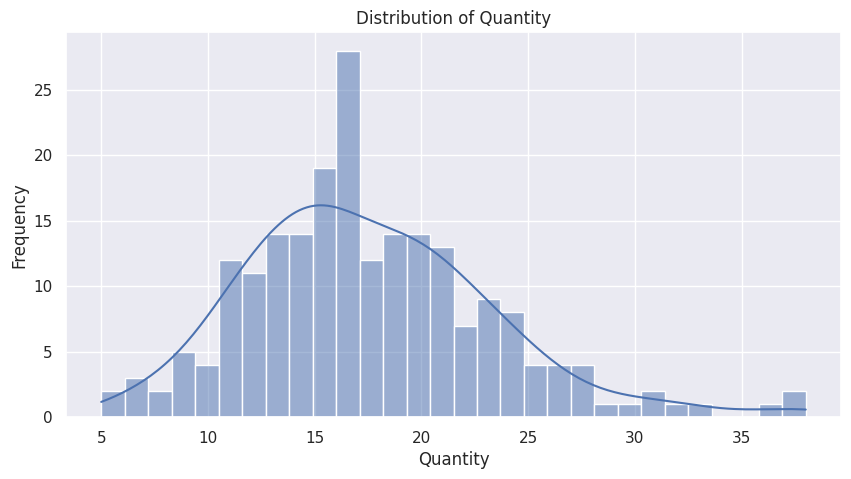

In [115]:
plt.figure(figsize=(10, 5))
sns.histplot(masterdata['Quantity'], kde=True, bins=30)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

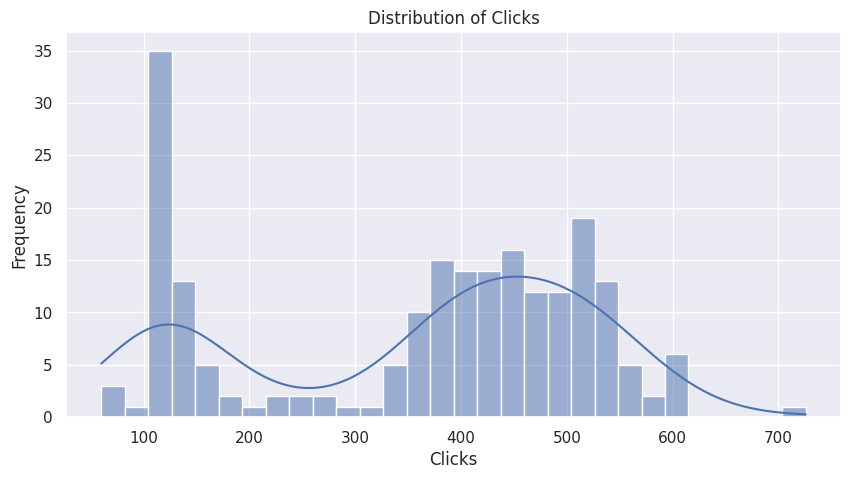

In [116]:
plt.figure(figsize=(10, 5))
sns.histplot(masterdata['Clicks'], kde=True, bins=30)
plt.title('Distribution of Clicks')
plt.xlabel('Clicks')
plt.ylabel('Frequency')
plt.show()

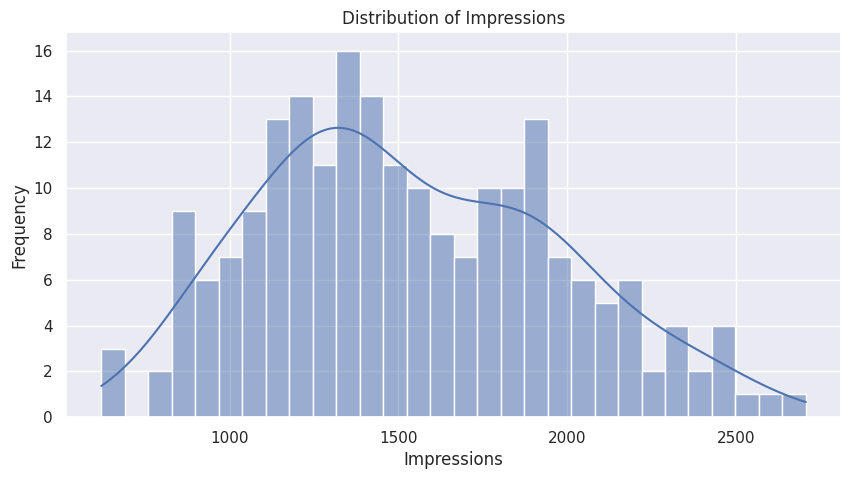

In [117]:
plt.figure(figsize=(10, 5))
sns.histplot(masterdata['Impressions'], kde=True, bins=30)
plt.title('Distribution of Impressions')
plt.xlabel('Impressions')
plt.ylabel('Frequency')
plt.show()

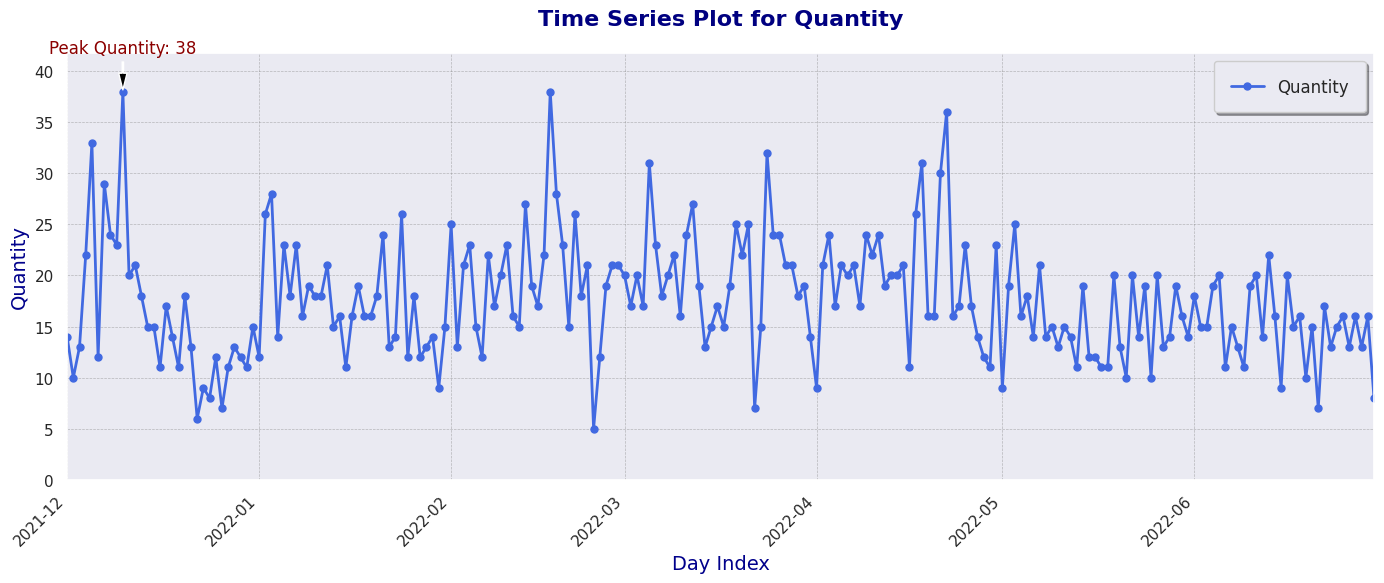

In [118]:
plt.figure(figsize=(14, 6))

plt.plot(masterdata.index, masterdata['Quantity'], color='royalblue', linewidth=2, marker='o', markersize=5, label='Quantity')

plt.title('Time Series Plot for Quantity', fontsize=16, fontweight='bold', color='navy', pad=20)
plt.xlabel('Day Index', fontsize=14, color='darkblue')
plt.ylabel('Quantity', fontsize=14, color='darkblue')

plt.legend(loc='upper right', fontsize=12, shadow=True, borderpad=1)

plt.xlim(masterdata.index.min(), masterdata.index.max())
plt.ylim(0, masterdata['Quantity'].max() * 1.1)  # Leave 10% space above the highest value

plt.xticks(rotation=45, ha='right')

plt.grid( which='both', color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

#annotation to highlight a peak data point
peak_day = masterdata['Quantity'].idxmax()  # Day of max Impressions
peak_value = masterdata['Quantity'].max()  # Max Impressions value
plt.annotate(f'Peak Quantity: {peak_value}',
             xy=(peak_day, peak_value),
             xytext=(peak_day, peak_value * 1.1),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6),
             fontsize=12, color='darkred', ha='center')

plt.tight_layout()
plt.show()

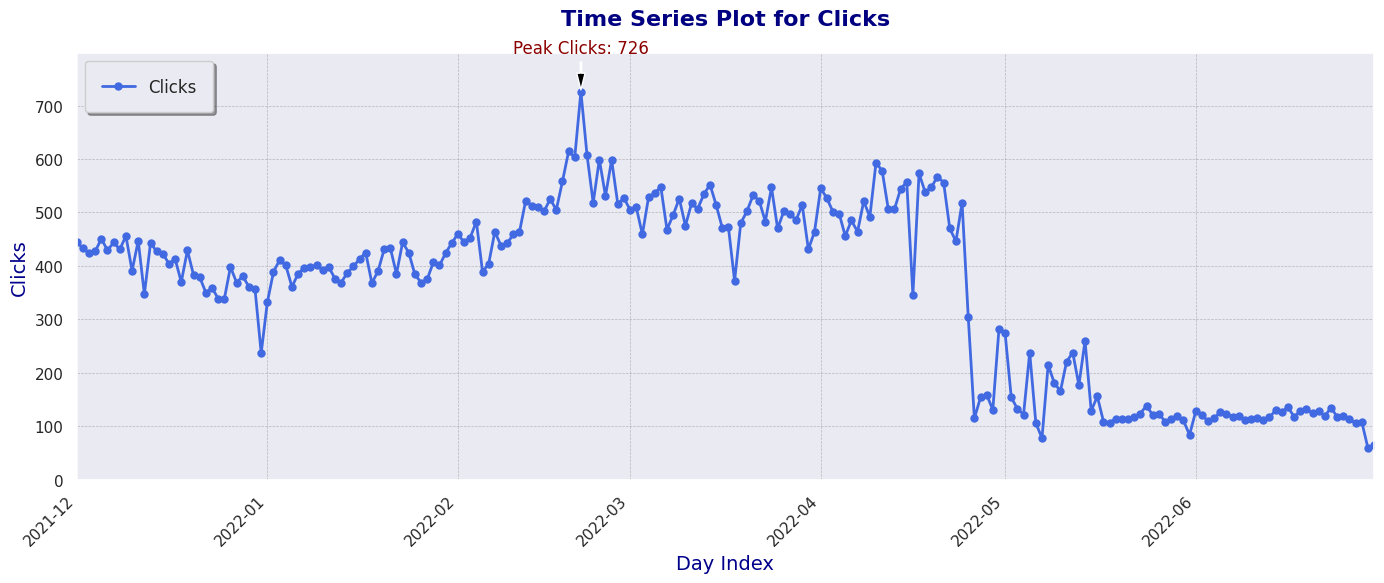

In [119]:
plt.figure(figsize=(14, 6))

plt.plot(masterdata.index, masterdata['Clicks'], color='royalblue', linewidth=2, marker='o', markersize=5, label='Clicks')

plt.title('Time Series Plot for Clicks', fontsize=16, fontweight='bold', color='navy', pad=20)
plt.xlabel('Day Index', fontsize=14, color='darkblue')
plt.ylabel('Clicks', fontsize=14, color='darkblue')

plt.legend(loc='upper left', fontsize=12, shadow=True, borderpad=1)

plt.xlim(masterdata.index.min(), masterdata.index.max())
plt.ylim(0, masterdata['Clicks'].max() * 1.1)  # Leave 10% space above the highest value

plt.xticks(rotation=45, ha='right')

plt.grid( which='both', color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

#annotation to highlight a peak data point
peak_day = masterdata['Clicks'].idxmax()  # Day of max Impressions
peak_value = masterdata['Clicks'].max()  # Max Impressions value
plt.annotate(f'Peak Clicks: {peak_value}',
             xy=(peak_day, peak_value),
             xytext=(peak_day, peak_value * 1.1),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6),
             fontsize=12, color='darkred', ha='center')

plt.tight_layout()
plt.show()

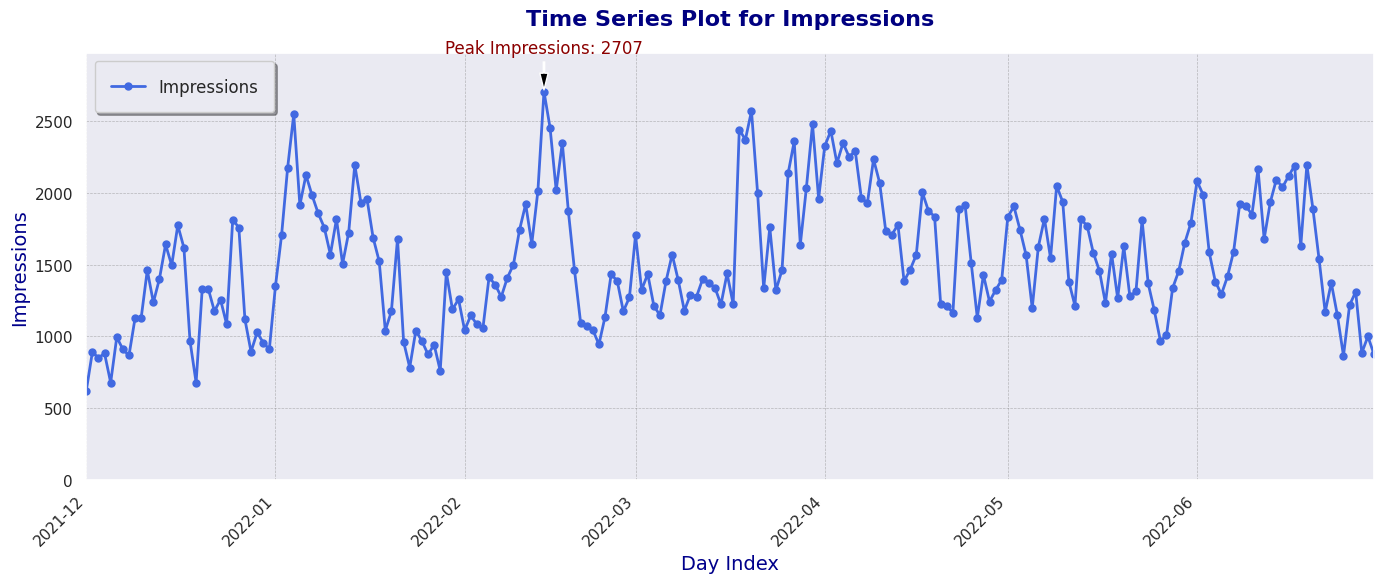

In [120]:
plt.figure(figsize=(14, 6))

plt.plot(masterdata.index, masterdata['Impressions'], color='royalblue', linewidth=2, marker='o', markersize=5, label='Impressions')

plt.title('Time Series Plot for Impressions', fontsize=16, fontweight='bold', color='navy', pad=20)
plt.xlabel('Day Index', fontsize=14, color='darkblue')
plt.ylabel('Impressions', fontsize=14, color='darkblue')

plt.legend(loc='upper left', fontsize=12, shadow=True, borderpad=1)

plt.xlim(masterdata.index.min(), masterdata.index.max())
plt.ylim(0, masterdata['Impressions'].max() * 1.1)  # Leave 10% space above the highest value

plt.xticks(rotation=45, ha='right')

plt.grid( which='both', color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

#annotation to highlight a peak data point
peak_day = masterdata['Impressions'].idxmax()  # Day of max Impressions
peak_value = masterdata['Impressions'].max()  # Max Impressions value
plt.annotate(f'Peak Impressions: {peak_value}',
             xy=(peak_day, peak_value),
             xytext=(peak_day, peak_value * 1.1),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6),
             fontsize=12, color='darkred', ha='center')

plt.tight_layout()
plt.show()

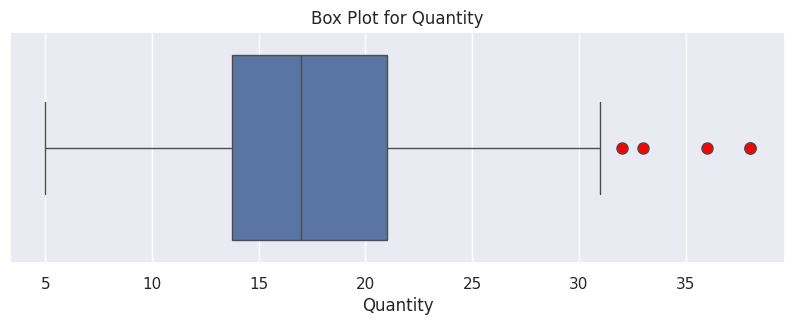

In [121]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=masterdata['Quantity'],
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
plt.title('Box Plot for Quantity')
plt.xlabel('Quantity')
plt.show()

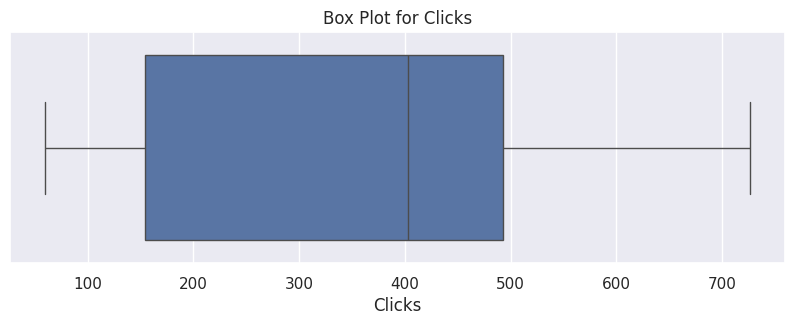

In [122]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=masterdata['Clicks'],
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
plt.title('Box Plot for Clicks')
plt.xlabel('Clicks')
plt.show()

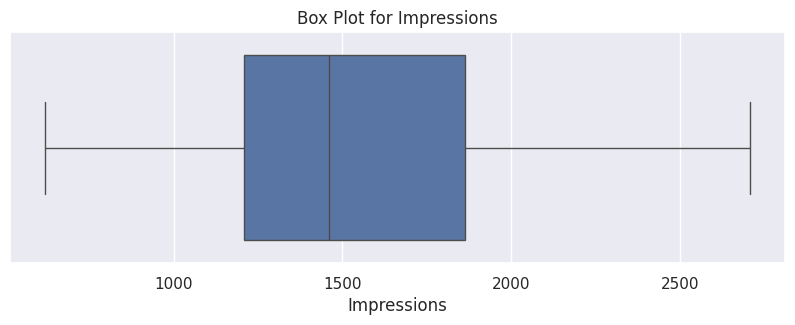

In [123]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=masterdata['Impressions'],
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
plt.title('Box Plot for Impressions')
plt.xlabel('Impressions')
plt.show()

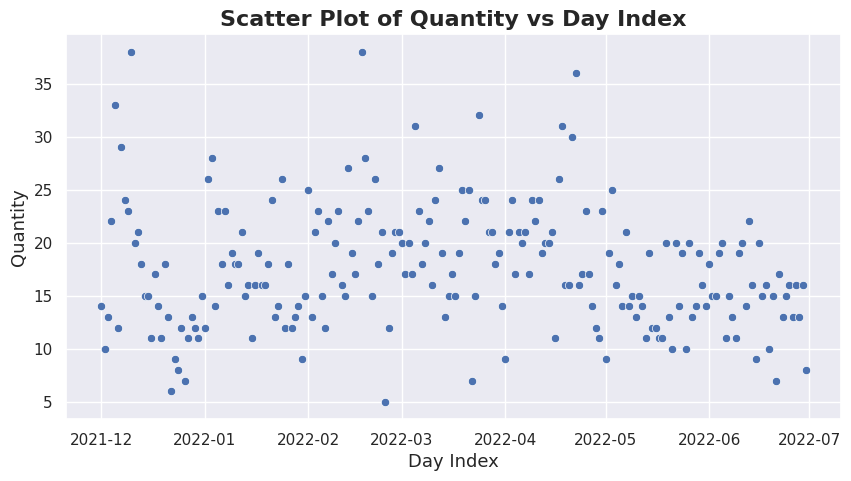

In [124]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=masterdata, x=masterdata.index, y='Quantity')
plt.title('Scatter Plot of Quantity vs Day Index', fontsize=16, fontweight='bold')
plt.xlabel('Day Index', fontsize=13)
plt.ylabel('Quantity', fontsize=13)
plt.show()

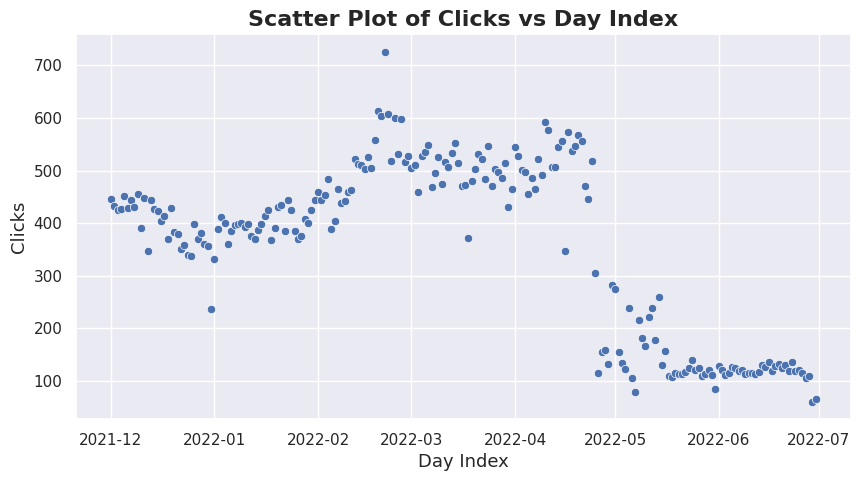

In [125]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=masterdata, x=masterdata.index, y='Clicks')
plt.title('Scatter Plot of Clicks vs Day Index', fontsize=16, fontweight='bold')
plt.xlabel('Day Index', fontsize=13)
plt.ylabel('Clicks', fontsize=13)
plt.show()

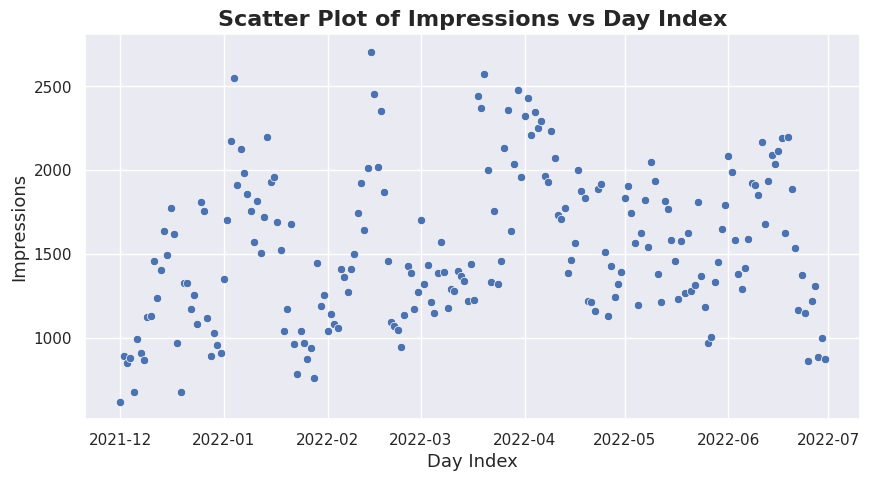

In [126]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=masterdata, x=masterdata.index, y='Impressions')
plt.title('Scatter Plot of Impressions vs Day Index', fontsize=16, fontweight='bold')
plt.xlabel('Day Index', fontsize=13)
plt.ylabel('Impressions', fontsize=13)
plt.show()

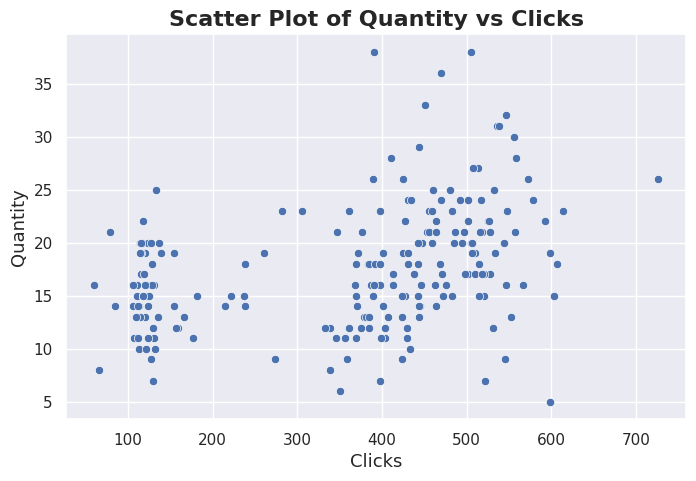

In [127]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=masterdata, x='Clicks', y='Quantity')
plt.title('Scatter Plot of Quantity vs Clicks', fontsize=16, fontweight='bold')
plt.xlabel('Clicks', fontsize=13)
plt.ylabel('Quantity', fontsize=13)
plt.show()

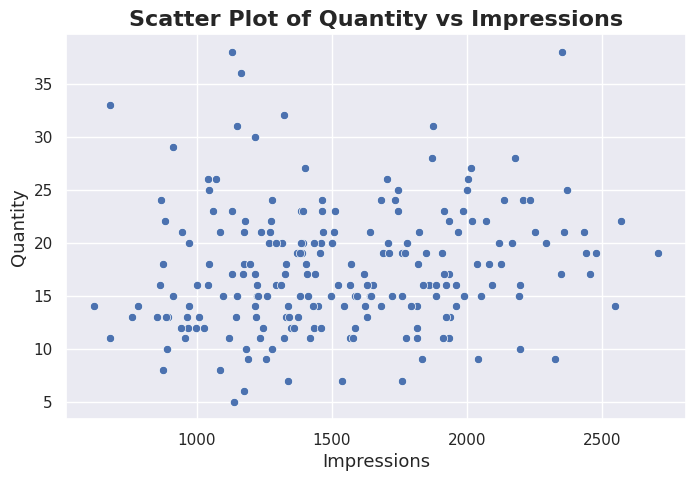

In [128]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=masterdata, x='Impressions', y='Quantity')
plt.title('Scatter Plot of Quantity vs Impressions', fontsize=16, fontweight='bold')
plt.xlabel('Impressions', fontsize=13)
plt.ylabel('Quantity', fontsize=13)
plt.show()

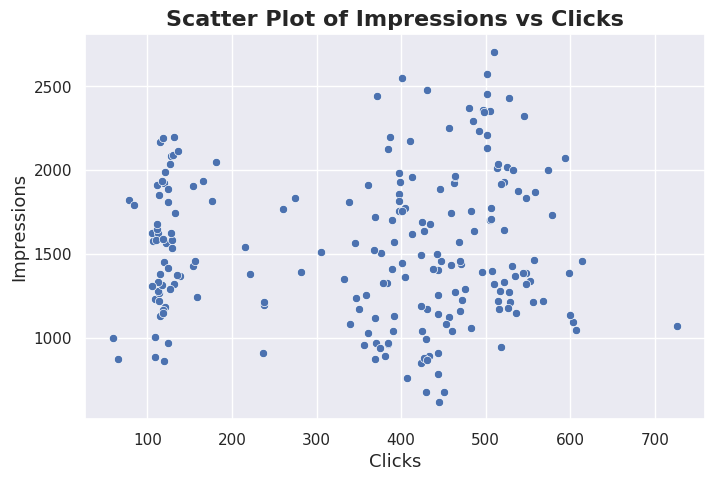

In [129]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=masterdata, x='Clicks', y='Impressions')
plt.title('Scatter Plot of Impressions vs Clicks', fontsize=16, fontweight='bold')
plt.xlabel('Clicks', fontsize=13)
plt.ylabel('Impressions', fontsize=13)
plt.show()

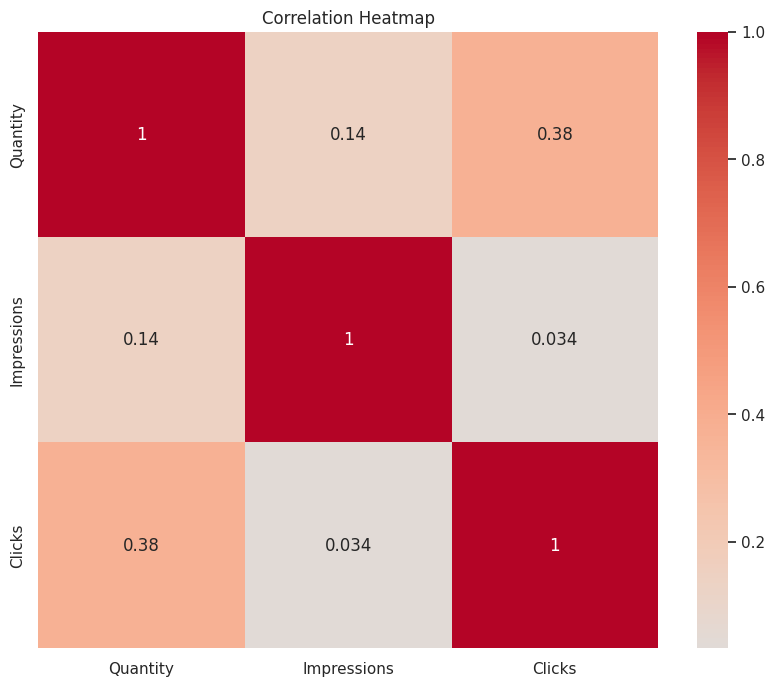

In [130]:
plt.figure(figsize=(10, 8))
correlation_matrix = masterdata.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

MISSING VALUES-IMPUTATION

In [131]:
print("MISSING VALUES:")
missingrows_count=masterdata.isnull().sum()
print(missingrows_count)

MISSING VALUES:
Quantity       0
Impressions    0
Clicks         0
dtype: int64


NO IMPUTATION REQUIRED AS THERE ARE NO MISSING VALUES

DROPING DUPLICATES

In [132]:
masterdata.drop_duplicates()

,Quantity,Impressions,Clicks
Day Index,,,
2021-12-01,14,620,445
2021-12-02,10,890,433
2021-12-03,13,851,424
2021-12-04,22,881,427
2021-12-05,33,678,451
...,...,...,...
2022-06-26,13,1218,114
2022-06-27,16,1311,106
2022-06-28,13,885,109


NO DUPLICATES FOUND AS NO ROWS WERE DROPPED AFTER USING drop_duplicates().

In [ ]:
print(masterdata)

     Day Index  Quantity  Impressions  Clicks
0   2021-12-01        14          620     445
1   2021-12-02        10          890     433
2   2021-12-03        13          851     424
3   2021-12-04        22          881     427
4   2021-12-05        33          678     451
..         ...       ...          ...     ...
207 2022-06-26        13         1218     114
208 2022-06-27        16         1311     106
209 2022-06-28        13          885     109
210 2022-06-29        16         1000      60
211 2022-06-30         8          875      65

[212 rows x 4 columns]


DETECTING OUTLIERS

In [ ]:
outliers={}
for column in masterdata.columns:
  q1=masterdata[column].quantile(0.25)
  q3=masterdata[column].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  outliers[column]=[]
  for value in masterdata[column]:
    if value<lower_bound or value>upper_bound:
        outliers[column].append(value)
print("THE OUTLIERS OF QUANTITY COLUMN ARE:")
print(outliers['Quantity'])
print("THE OUTLIERS OF IMPRESSIONS COLUMN ARE:")
print(outliers['Impressions'])
print("THE OUTLIERS OF CLICKS COLUMN ARE:")
print(outliers['Clicks'])


THE OUTLIERS OF QUANTITY COLUMN ARE:
[33, 38, 38, 32, 36]
THE OUTLIERS OF IMPRESSIONS COLUMN ARE:
[]
THE OUTLIERS OF CLICKS COLUMN ARE:
[]


HANDLING OUTLIERS USING IMPUTATION (REPLACING WITH MEDIAN VALUE OF COLUMN)

In [ ]:
outliers={}
for column in masterdata.columns:
  q1=masterdata[column].quantile(0.25)
  q3=masterdata[column].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  median=masterdata[column].median()
  for value in masterdata[column]:
    if value<lower_bound or value>upper_bound:
        masterdata[column]=masterdata[column].replace(value,median)

🔼YOU MAY HAVE TO PERFORM THE IMPUTATION PROCESS REPEATED TIMES TO REMOVE THE OUTLIERS COMPLETELY.

FINAL CHECK FOR REMAINING OUTLIERS

In [ ]:
outliers={}
for column in masterdata.columns:
  q1=masterdata[column].quantile(0.25)
  q3=masterdata[column].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  outliers[column]=[]
  for value in masterdata[column]:
    if value<lower_bound or value>upper_bound:
        outliers[column].append(value)
print("THE OUTLIERS OF QUANTITY COLUMN ARE:")
print(outliers['Quantity'])
print("THE OUTLIERS OF IMPRESSIONS COLUMN ARE:")
print(outliers['Impressions'])
print("THE OUTLIERS OF CLICKS COLUMN ARE:")
print(outliers['Clicks'])


THE OUTLIERS OF QUANTITY COLUMN ARE:
[]
THE OUTLIERS OF IMPRESSIONS COLUMN ARE:
[]
THE OUTLIERS OF CLICKS COLUMN ARE:
[]
